In [ ]:
#default_exp puzzle_3D

# A three dimensional puzzle 

> Combining spatial and spectral   

In [ ]:
#hide 
%load_ext autoreload
%autoreload 2 
%matplotlib notebook 

In [ ]:
# hide 
import os
os.chdir('/home/frank/Work/Projecten/DoRe/viz/raw_nmf')

In [ ]:
#hide 
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib notebook

In the previous sections we have separately explored the spatial and spectral dimensions of our three dimensional data. Now it is time to combine it all and try to explain the patterns that we see.  

In [ ]:
from maxrf4u import DataStack, HotmaxAtlas , plot_puzzle, plot_ptrn, get_peakmaps, plot_peak_slices 

In [ ]:
ds = DataStack('RP-T-1898-A-3689.datastack')
hma = HotmaxAtlas('RP-T-1898-A-3689.datastack') 

In [ ]:
x_keVs = ds.read(ds.MAXRF_ENERGIES)
y_max = ds.read(ds.MAXRF_MAXSPECTRUM)
arr = ds.read(ds.MAXRF_CUBE, compute=False) 
hotmax_spectra = ds.read('hotmax_spectra')
hotmax_pixels = ds.read('hotmax_pixels')
imvis_reg = ds.read('imvis_reg_highres')
imvis_extent = ds.read('imvis_extent')

In [ ]:
Mn_y, Mn_x, Mn_z = hotmax_pixels[9]

<IPython.core.display.Javascript object>


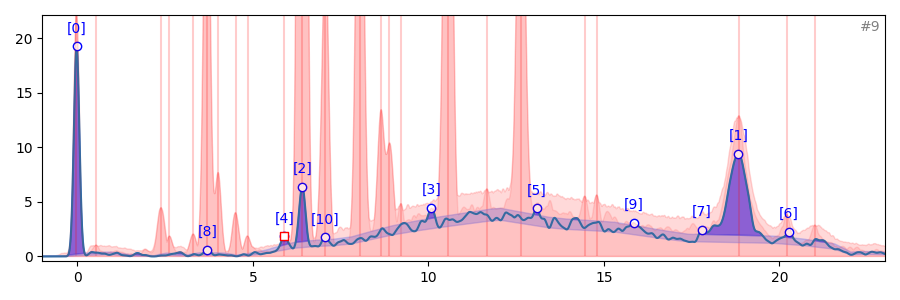

In [ ]:
hma.plot_spectrum(9);

In [ ]:
peak_maps, keV_maps = get_peakmaps(arr, x_keVs, hotmax_spectra[9]) 

<IPython.core.display.Javascript object>


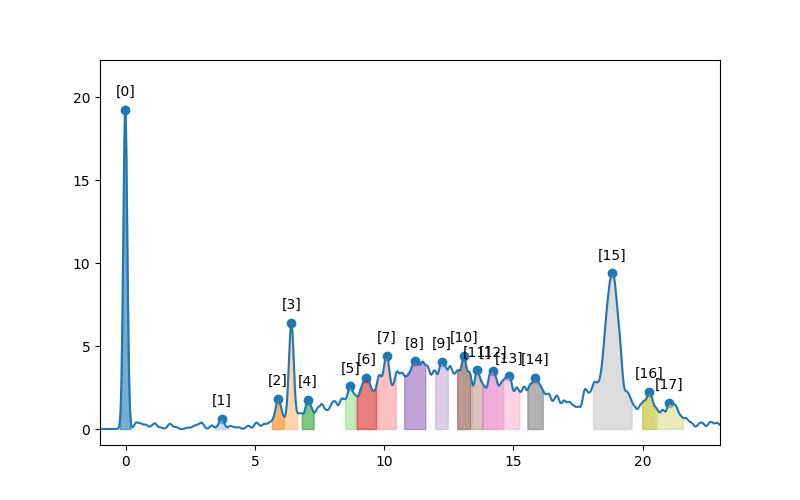

(-1.0, 23.0)

In [ ]:
fig, ax = plot_peak_slices(x_keVs, hotmax_spectra[9])
ax.set_xlim([-1, 23])

<IPython.core.display.Javascript object>


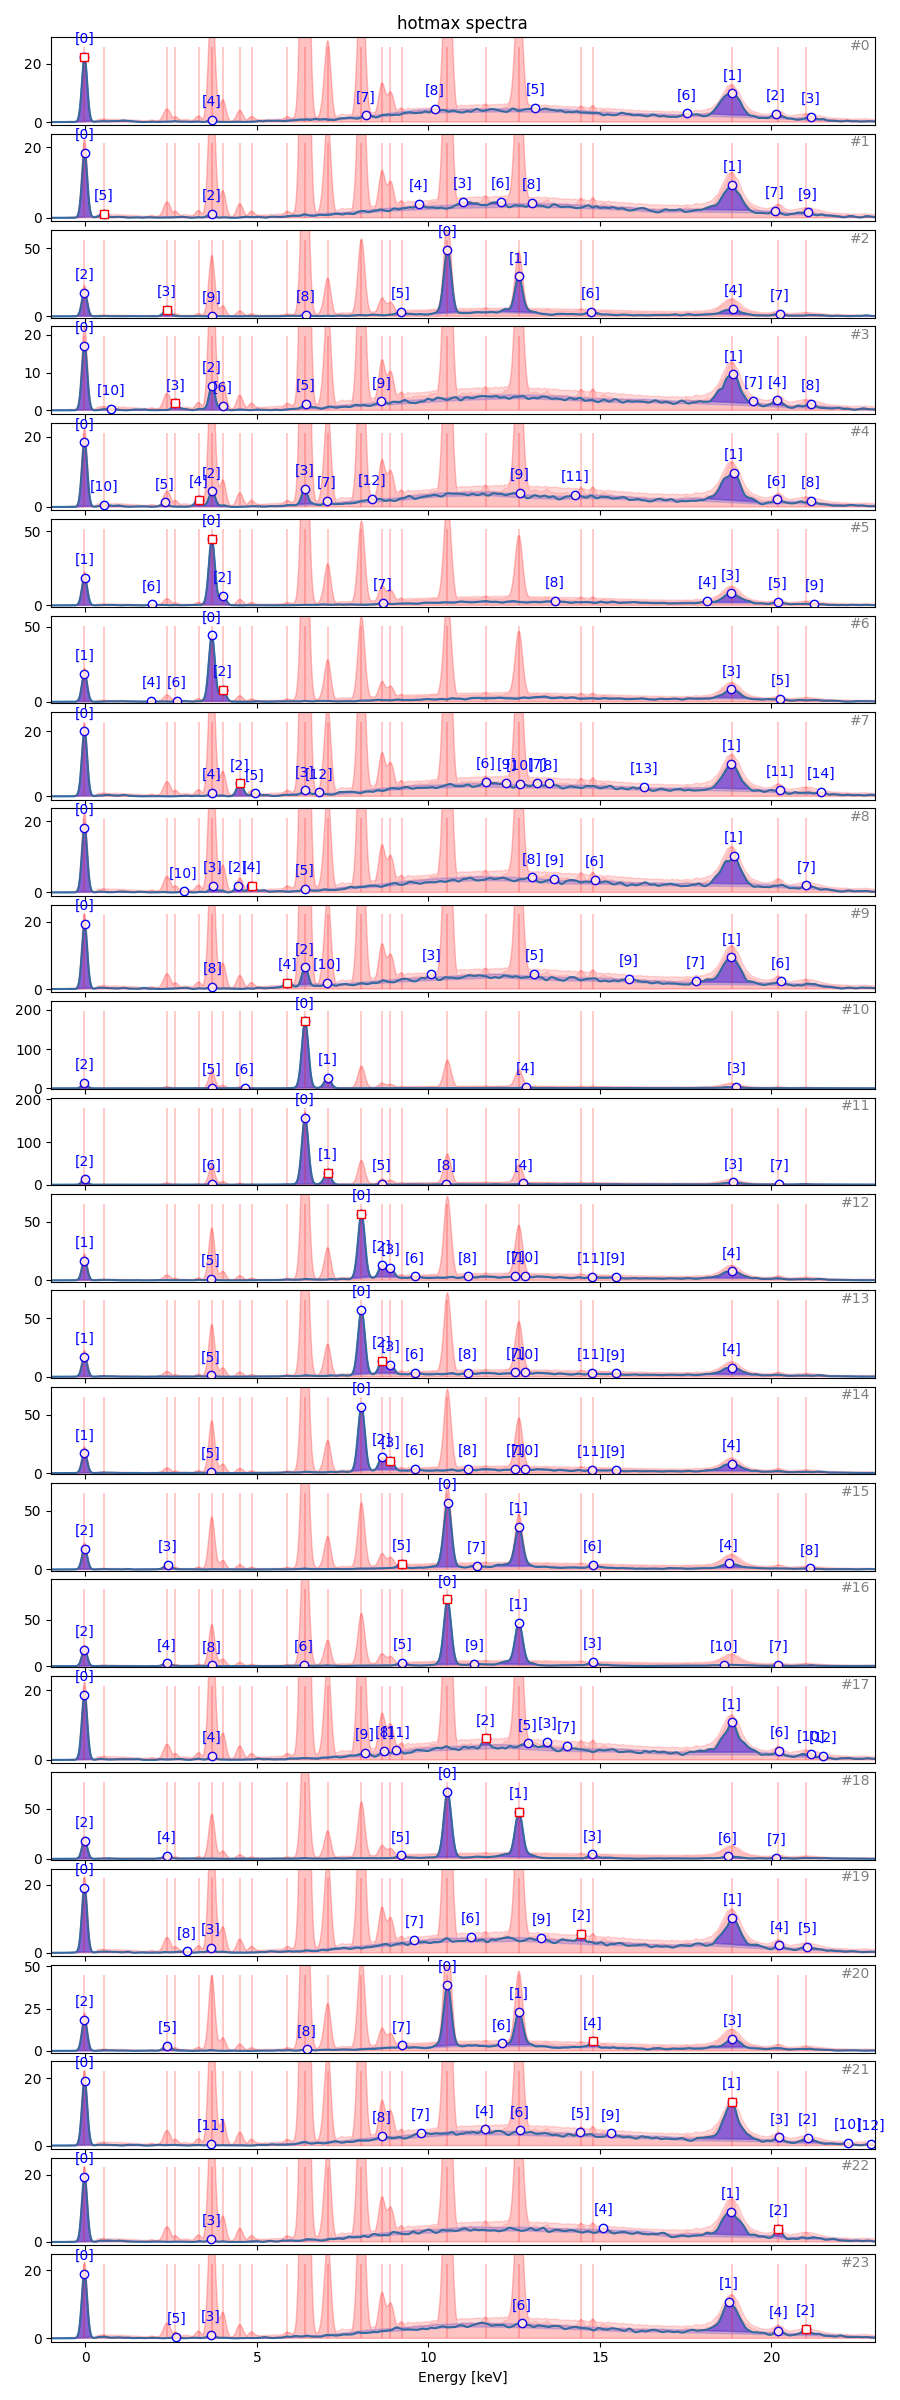

In [ ]:
hma.plot_spectra(svg=False)

<IPython.core.display.Javascript object>


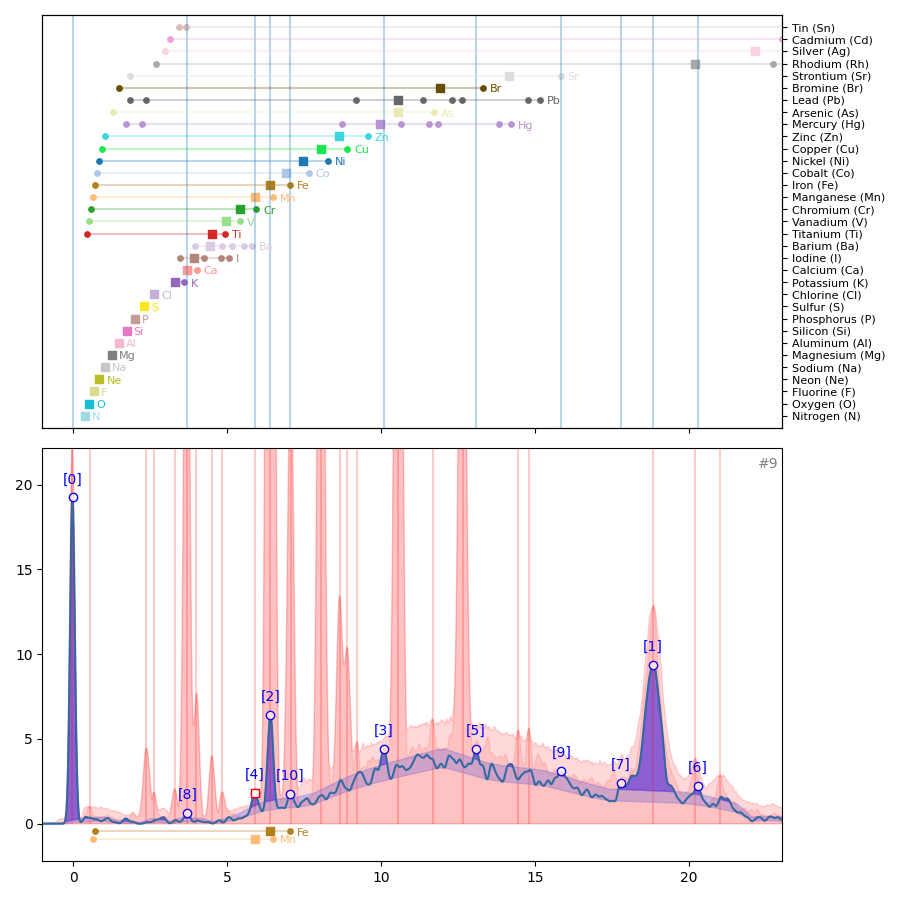

In [ ]:
n = 9
ax0, ax1 = plot_puzzle(hma, n) 

# patterns 
plot_ptrn('Fe', -1, ax1);
plot_ptrn('Mn', -2, ax1);

<IPython.core.display.Javascript object>


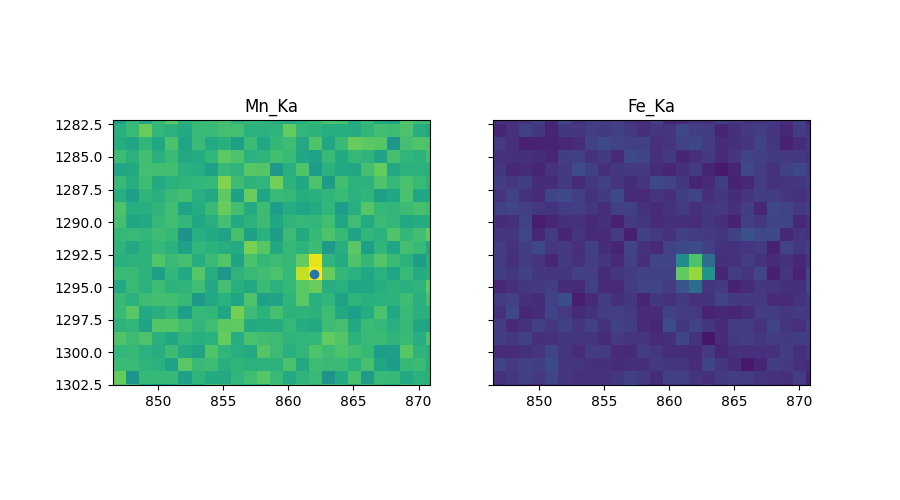

In [ ]:
fig, [ax, ax1] = plt.subplots(ncols=2, figsize=[9, 5], sharex=True, sharey=True)

ax.imshow(peak_maps[2], vmax=1)
ax.set_title('Mn_Ka')
ax.scatter(Mn_x, Mn_y)
ax1.imshow(peak_maps[3], vmax=0.04)
ax1.set_title('Fe_Ka');

**This is better. I found that manganese hotmax speckle does contain iron as expected. I have been messing around with peak numbers that were different...**

<IPython.core.display.Javascript object>


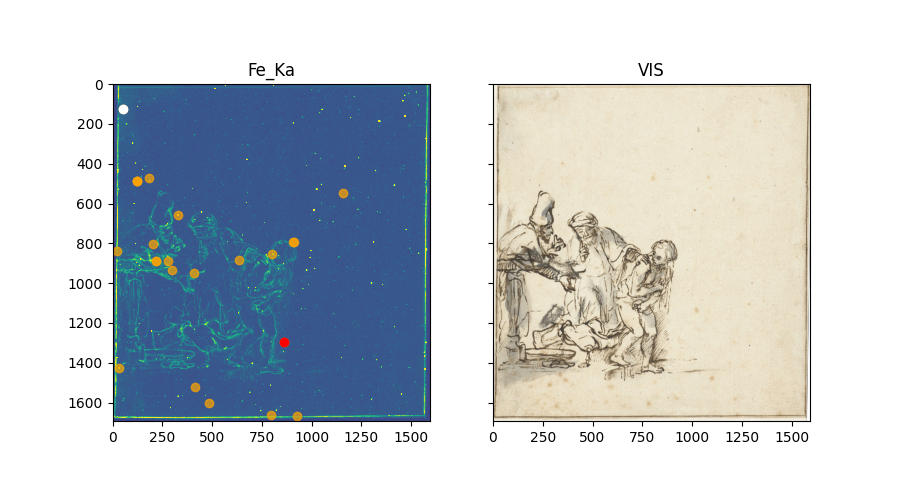

In [ ]:
fig, [ax, ax1] = plt.subplots(ncols=2, figsize=[9, 5], sharex=True, sharey=True)

ax.imshow(peak_maps[9], vmax=0.02)
ax.set_title('Fe_Ka')
ax.scatter(x, y, alpha=0.7, color='orange')
n = 9 # Fe_Ka 
ax.scatter(x[n], y[n], color='r')

n = 8 # Mn_Ka 
ax.scatter(x[n], y[n], color='w')  
ax1.imshow(imvis_reg, extent=imvis_extent)
ax1.set_title('VIS');

In [ ]:
Mn_map = arr[:,:,hotmax_pixels[8][-1]].compute() # nescessary to locate the manganese particle... 

<IPython.core.display.Javascript object>


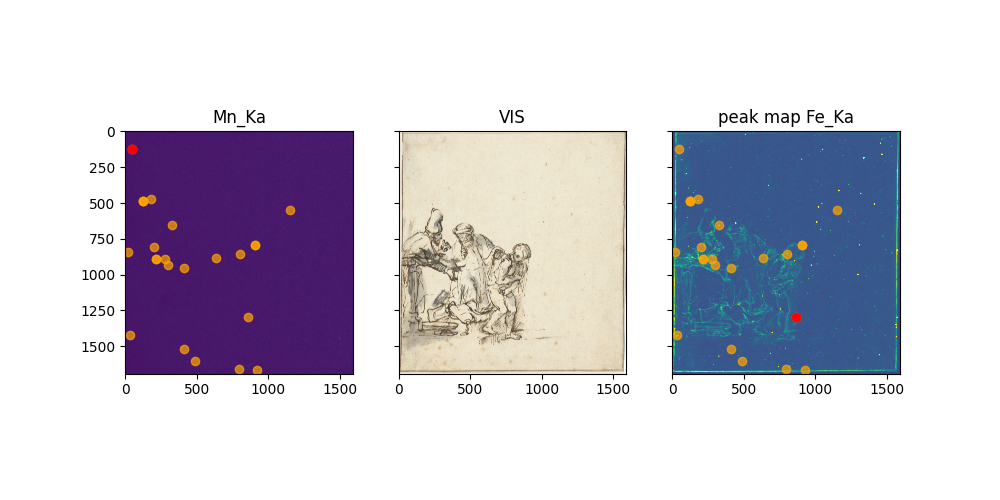

<matplotlib.collections.PathCollection>

In [ ]:
n = 8
fig, [ax, ax1, ax2] = plt.subplots(ncols=3, figsize=[10, 5], sharex=True, sharey=True)

#ax.imshow(peak_maps[n])
ax.imshow(Mn_map)
ax.set_title('Mn_Ka')
ax.scatter(x, y, alpha=0.7, color='orange')
 
ax.scatter(x[n], y[n], color='r')

ax1.imshow(imvis_reg, extent=imvis_extent)
ax1.set_title('VIS');

ax2.imshow(peak_maps[9], vmax=0.02)
ax2.set_title('peak map Fe_Ka')
ax2.scatter(x, y, alpha=0.7, color='orange')
ax2.scatter(x[9], y[9], color='r')

When hunting down the manganese peak, it becomes evident that only a very tiny particle is present. In the integrated peakslice map, this signal can not be found back... 

<IPython.core.display.Javascript object>


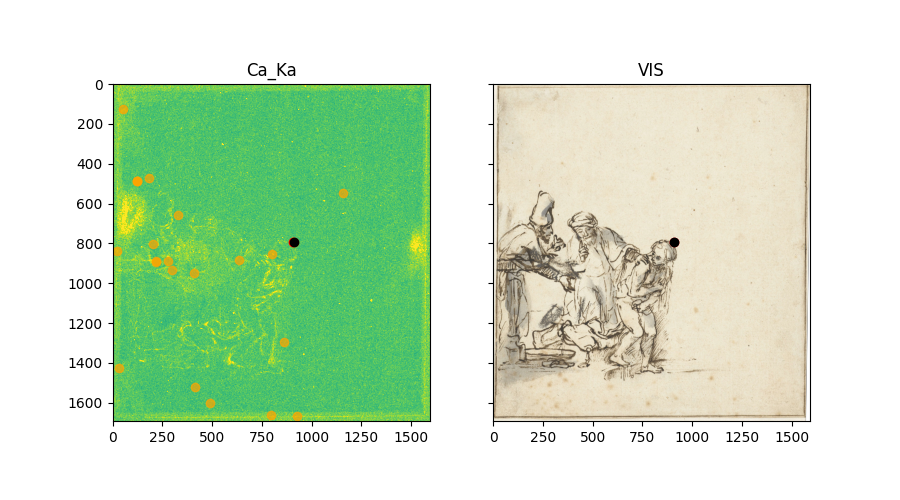

In [ ]:
fig, [ax, ax1] = plt.subplots(ncols=2, figsize=[9, 5], sharex=True, sharey=True)

ax.imshow(peak_maps[5], vmax=0.05)
ax.set_title('Ca_Ka')

ax.scatter(x, y, alpha=0.7, color='orange')
ax.scatter(x[5], y[5], color='r')
ax.scatter(x[6], y[6], color='k')
 
ax1.imshow(imvis_reg, extent=imvis_extent)
ax1.scatter(x[5], y[5], color='r')
ax1.scatter(x[6], y[6], color='k')
ax1.set_title('VIS');

In [ ]:
Ca_Kb_map = arr[:,:,hotmax_pixels[6][-1]].compute() # check if signal is better 

<IPython.core.display.Javascript object>


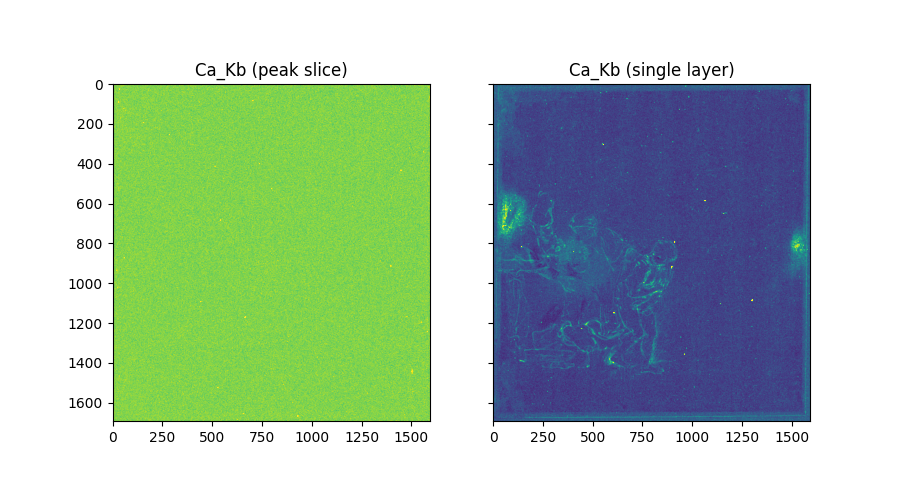

Text(0.5, 1.0, 'Ca_Kb (single layer)')

In [ ]:
fig, [ax, ax1] = plt.subplots(ncols=2, figsize=[9, 5], sharex=True, sharey=True)

ax.imshow(peak_maps[6], vmax=0.03)
ax.set_title('Ca_Kb (peak slice)');


ax1.imshow(Ca_Kb_map, vmax=0.8)
ax1.set_title('Ca_Kb (single layer)')

**Mm, this is a dramatic finding.** We need to create a ragged slice integration. Also, it remains unclear why we find calcium on the ink lines, and as particles in the paper background... 

In [ ]:
Ca_Ka_map = arr[:,:,hotmax_pixels[5][-1]].compute() # check if signal is better 

<IPython.core.display.Javascript object>


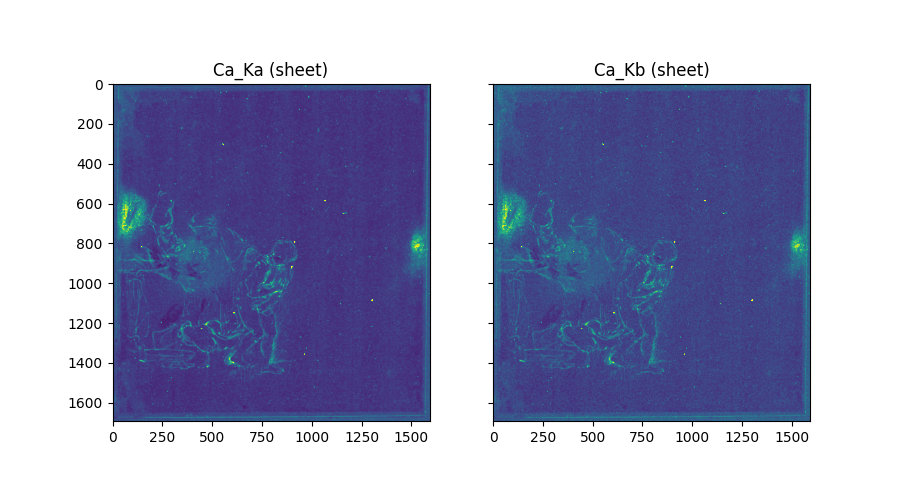

In [ ]:
fig, [ax, ax1] = plt.subplots(ncols=2, figsize=[9, 5], sharex=True, sharey=True)

ax.imshow(Ca_Ka_map, vmax=5)
ax.set_title('Ca_Ka (sheet)');

ax1.imshow(Ca_Kb_map, vmax=0.8)
ax1.set_title('Ca_Kb (sheet)');

In [ ]:
peaksheet_maps = [arr[:,:,hotmax_pixels[i][-1]].compute() for i in range(len(peak_maps))]

The ultimate acid test is a comparison of the iron maps...

<IPython.core.display.Javascript object>


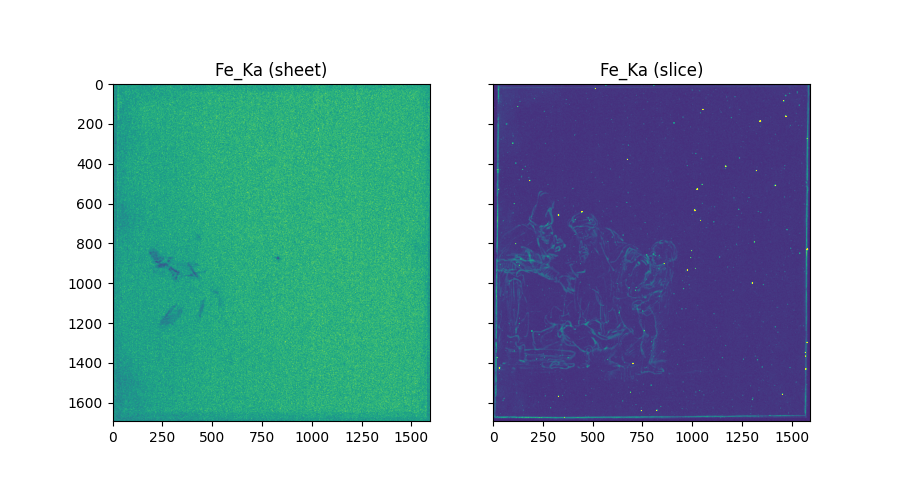

In [ ]:
fig, [ax, ax1] = plt.subplots(ncols=2, figsize=[9, 5], sharex=True, sharey=True) 

ax.imshow(peaksheet_maps[9]/peaksheet_maps[9].max(), vmax=0.4)
ax.set_title('Fe_Ka (sheet)')

ax1.imshow(peak_maps[9], vmax=0.04)
ax1.set_title('Fe_Ka (slice)'); 

Ok, need to develop a ragged slice integration...